<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/CIFAR10_%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###*Терпи и читай, проще уже не будет. Отвечаю*

**Полезные и приятные ссылки на пояснения с картинками:**


[ML: Введение в PyTorch: 3. Нейронные сети](https://qudata.com/ml/ru/NN_Base_Torch_NN.html#summary)

[Объяснение работы CNN](https://qudata.com/ml/ru/NN_CNN_Explainable.html)

[WELCOME TO PYTORCH TUTORIALS](https://pytorch.org/tutorials/)

**Материалы взяты из источника:** 

[Обучение модели с помощью PyTorch](https://learn.microsoft.com/ru-ru/windows/ai/windows-ml/tutorials/pytorch-train-model#how-does-a-neural-network-work)




###Загрузка данных


---



Здесь мы применим набор данных **CIFAR10** для создания и обучения модели классификации. Набор данных CIFAR10 очень широко используется в сфере исследований машинного обучения. Он содержит 50 000 изображений для обучения и еще 10 000 изображений для тестирования. Каждое из них имеет размер 3×32×32 (трехканальный цвет, 32 пикселя в высоту и 32 пикселя в ширину).



Эти изображения разделены на 10 классов: airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9).



Для загрузки и чтения набора данных CIFAR10 в PyTorch нужно выполнить **три шага**:


1.   **Определите преобразования**, которые будут применяться к изображению. Для обучения модели вам нужно преобразовать изображения в тензоры или привести к нормализованному диапазону [-1,1].
2.   Создайте экземпляр доступного **набора данных** и загрузите его. Чтобы загрузить данные, используется абстрактный класс torch.utils.data.Dataset для представления набора данных. Этот набор данных будет скачан на локальный компьютер только при первом выполнении кода.
3.   **Доступ к данным** с использованием DataLoader. Чтобы получить доступ к данным и поместить их в память компьютера, используется класс torch.utils.data.DataLoader. DataLoader в PyTorch выполняет роль оболочки для набора данных и предоставляет доступ к базовым данным. Эта оболочка будет содержать пакеты изображений заданного размера.









In [ ]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

Загрузка и нормализация данных. Определение преобразований для тренировочной и тестовой выборки.

In [ ]:
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

Набор данных CIFAR10 состоит из 50 000 обучающих изображений. Необходимо определить размер пакета 10 для загрузки 5000 пакетов изображений.

**Batch_size** - это

In [ ]:
batch_size = 10
number_of_labels = 10 

Создана копия (экземпляр) для обучения (тренировки)

При запуске этого кода в первый раз, тренировочный набор данных (сет, датасет) загружается локально.

In [ ]:
train_set =CIFAR10(root="./data",train=True,transform=transformations,download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Необходимо создать загрузчик для обучающего набора, который будет считывать данные в пределах размера партии и помещать в память.

**DataLoader**

In [ ]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
print("The number of images in a training set is: ", len(train_loader)*batch_size)

The number of images in a training set is:  50000


##### Create an instance for testing, note that train is set to False.
##### When we run this code for the first time, the CIFAR10 test dataset will be downloaded locally. 

In [ ]:
test_set = CIFAR10(root="./data", train=False, transform=transformations, download=True)

Files already downloaded and verified


##### Create a loader for the test set which will read the data within batch size and put into memory. 
##### Note that each shuffle is set to false for the test loader.

In [ ]:
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
print("The number of images in a test set is: ", len(test_loader)*batch_size)

print("The number of batches per epoch is: ", len(train_loader))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

The number of images in a test set is:  10000
The number of batches per epoch is:  5000


###Обучение модели с помощью PyTorch


---



Для обучения классификатора изображений с помощью PyTorch нужно выполнить следующие действия:
1. Загрузите данные. Если вы выполнили задачи на предыдущем этапе этого руководства, значит, эта часть уже готова.
2. Определение нейронной сети свертки.
3. Определение функции потери.
4. Обучение модели по данным для обучения.
5. Тестирование модели по данным для проверки.


Чтобы создать с помощью PyTorch нейронную сеть, используйте пакет` torch.nn.` Этот пакет содержит модули, расширяемые классы и все компоненты, необходимые для создания нейронных сетей.

Структура нашей сети будет включать следующие 14 слоев:

`Conv -> BatchNorm -> ReLU -> Conv -> BatchNorm -> ReLU -> MaxPool -> Conv -> BatchNorm -> ReLU -> Conv -> BatchNorm -> ReLU -> Linear`.

#### Слой свертки

---


Слой свертки является основным в структуре CNN и предназначен для обнаружения признаков на изображениях. Каждый из слоев содержит несколько каналов, которые обнаруживают определенные виды признаков, а также несколько ядер для определения размера обнаруженных признаков. Таким образом, слой свертки с 64 каналами и размером ядра 3×3 может обнаруживать 64 отдельных признака размером 3×3 каждый. Определяя слой свертки, вам следует указать число входящих каналов, число исходящих каналов и размер ядра. Число исходящих каналов каждого слоя определяет число входящих каналов для следующего слоя.

Пример: слой свертки с параметрами `in-channels=3`, `out-channels=10` и `kernel-size=6` будет принимать на вход RGB-изображение (три канала) и применять к изображениям 10 детекторов признаков с размером ядра 6×6. Чем меньше размер ядра, тем быстрее выполняется вычисление и меньше результатов с одинаковым весом.

#### Другие слои

---


Слои в нашей сети расположены в следующем порядке:

* Слой `ReLU` выполняет роль функции активации, которая присваивает всем входящим признакам значения не меньше нуля. При применении этого слоя все отрицательные числа заменяются нулями, а положительные сохраняются без изменений.
* Слой `BatchNorm2d` применяет нормализацию входа так, чтобы среднее значение и вариантность элементов стали нулевыми. Это повышает точность работы сети.
* Слой `MaxPool` позволяет сделать так, чтобы расположение объекта в изображении не влияло на способность нейронной сети обнаруживать его признаки.
* Слои `Linear` завершают структуру нашей сети и используются для вычисления оценки по каждому классу. В наборе данных CIFAR10 присвоены метки десяти классов. Прогнозом модели будет считаться та из этих меток, у которой самая высокая оценка. На линейном уровне вам нужно определить количество входящих признаков и количество исходящих признаков, которое обычно соответствует количеству классов.

####Как работает нейронная сеть?

---


Сеть типа **CNN** является **сетью прямого распространения**. В процессе обучения эта сеть будет обрабатывать входные данные поочередно в каждом слое и вычислять потери, обозначающие отклонение прогнозируемой метки для изображения от правильной, а также распространять градиенты обратно по сети для корректировки весовых коэффициентов в каждом слое. Повторяя этот процесс для большого набора данных, сеть постепенно "обучается", то есть подбирает весовые коэффициенты для достижения оптимального результата.

Функция **прямого распространения** позволяет вычислить значение функции потери, а **функция обратного распространения** — градиенты параметров, по которым выполняется обучение. Когда вы создаете нейронную сеть с помощью PyTorch, вам следует определить **только** функцию прямого распространения. Функция обратного распространения будет определена **автоматически**.

Пример функции прямого распространения в классе, определяющем нейронную сеть: `def forward(self, input):`

**Определим класс Network для CNN:**


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

# Define a convolution neural network
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        #перечисляем все слои, которые будем использовать от входного до выходного слоя
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*10*10, 10)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*10*10)
        output = self.fc1(output)

        return output

# Instantiate a neural network model 
model = Network()

####Определение функции потери

---


Функция потери позволяет вычислить значение, которое определяет отклонение выходного значения от целевого. Основная задача нейронной сети заключается в минимизации функции потери путем корректировки значений векторных весовых коэффициентов через функцию обратного распространения.

Значение потери не совпадает с точностью модели. Функция потери дает приблизительное представление о том, насколько хорошо работает модель после каждой итерации процесса оптимизации по набору для обучения. В свою очередь, точность модели вычисляется по набору для проверки и обозначает долю правильных прогнозов по нему.

В PyTorch пакет нейронной сети содержит несколько разных функций потери, которые и лежат в основе создания глубоких нейронных сетей. При работе с этим руководством вы примените функцию потери "Классификация", которая основана на процессе определения функции потери и использует тип потери "перекрестная энтропия" и оптимизатор Adam. Скорость обучения позволяет задать допустимую степень изменения весовых коэффициентов в нейронной сети в отношении градиента потери. В нашем примере задайте значение 0,001. Чем ниже это значение, тем медленнее выполняется обучение.

In [ ]:
from torch.optim import Adam
 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

#### Обучение модели по данным для обучения.


---


Чтобы обучить модель, нужно в цикле пропустить ее через итератор данных, передавая в сеть входные данные и оптимизируя ее результаты. PyTorch не предоставляет отдельной библиотеки для использования графического процессора, но вы можете вручную определить устройство для выполнения вычислений. Будет использоваться GPU Nvidia, если он установлен на вашем компьютере. Если это не так, будет использоваться обычный ЦП.

In [ ]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

#### Протестируйте модель по данным для проверки.


---


Теперь вы можете проверить модель по набору изображений из набора для проверки.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():
    # get batch of images from the test DataLoader  
    images, labels = next(iter(test_loader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
   
    # Show the real labels on the screen 
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]] 
                               for j in range(batch_size)))
  
    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)
    
    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)
    
    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] 
                              for j in range(batch_size)))

**Необязательно** — добавьте приведенную ниже функцию `testClassess` в файл `PyTorchTraining.py` и вызов этой функции `testClassess()` в функции main: `__name__ == "__main__".`

In [ ]:
# Function to test what classes performed well
def testClassess():
    class_correct = list(0. for i in range(number_of_labels))
    class_total = list(0. for i in range(number_of_labels))
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(batch_size):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(number_of_labels):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

The model will be running on cpu device
[1,  1000] loss: 0.669
[1,  2000] loss: 0.683
[1,  3000] loss: 0.696
[1,  4000] loss: 0.698
[1,  5000] loss: 0.722
For epoch 1 the test accuracy over the whole test set is 70 %
[2,  1000] loss: 0.611
[2,  2000] loss: 0.650
[2,  3000] loss: 0.654
[2,  4000] loss: 0.666
[2,  5000] loss: 0.664
For epoch 2 the test accuracy over the whole test set is 71 %
[3,  1000] loss: 0.572
[3,  2000] loss: 0.593
[3,  3000] loss: 0.630
[3,  4000] loss: 0.622
[3,  5000] loss: 0.636
For epoch 3 the test accuracy over the whole test set is 70 %
[4,  1000] loss: 0.534
[4,  2000] loss: 0.574
[4,  3000] loss: 0.578
[4,  4000] loss: 0.596
[4,  5000] loss: 0.595
For epoch 4 the test accuracy over the whole test set is 70 %
[5,  1000] loss: 0.506
[5,  2000] loss: 0.538
[5,  3000] loss: 0.548
[5,  4000] loss: 0.557
[5,  5000] loss: 0.588
For epoch 5 the test accuracy over the whole test set is 69 %
Finished Training


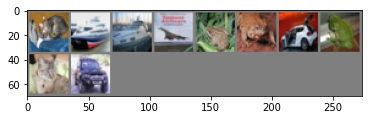

Real labels:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    cat plane   car plane  frog   cat   cat   cat   cat truck


In [ ]:
if __name__ == "__main__":
    
    # Let's build our model
    train(5)
    print('Finished Training')

    # Test which classes performed well
    testAccuracy()
    
    # Let's load the model we just created and test the accuracy per label
    model = Network()
    path = "myFirstModel.pth"
    model.load_state_dict(torch.load(path))

    # Test with batch of images
    testBatch()